In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

%matplotlib inline

In [33]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
# Droping the 'day', 'month', and 'year' columns
df.drop(columns=['day', 'month', 'year'], inplace=True, axis=1)

In [36]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [38]:
# Encoding: not fire as 0 and fire as 1
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [39]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [41]:
# Independent & Dependent Features
X = df.drop(columns=['FWI'], axis=1)
Y = df['FWI']

In [42]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [43]:
Y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [44]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [45]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [46]:
# Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

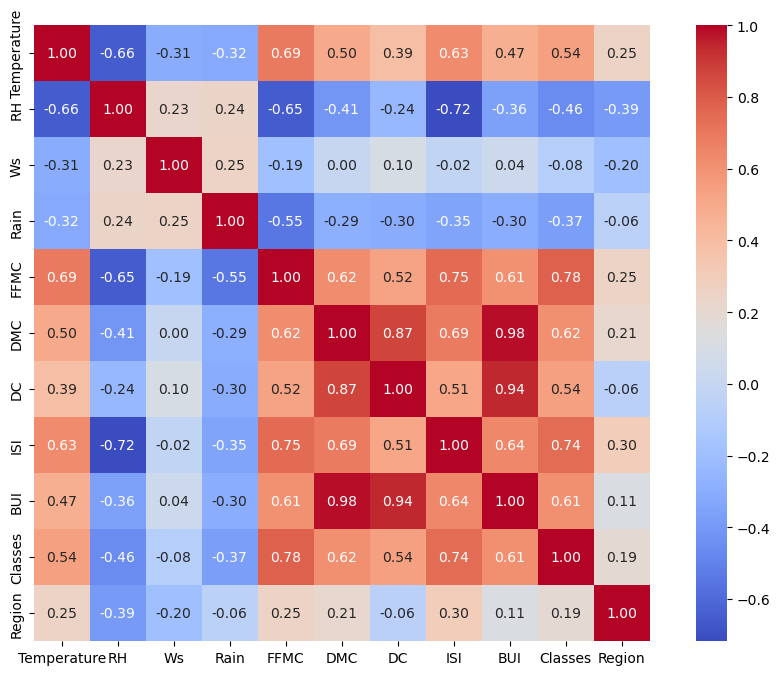

In [47]:
# Check for multi collinearity
plt.figure(figsize=(12, 8))
corr = X_train.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)

In [48]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute correlation
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
# Threshold for correlation - Domain knowledge suggests 0.85
corr_features = correlation(X_train, 0.85)

In [50]:
# Dropping highly correlated features
X_train.drop(corr_features, inplace=True, axis=1)
X_test.drop(corr_features, inplace=True, axis=1)

In [51]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [53]:
# Feature Scaling
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [54]:
X_train_scale

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

### Boxplot to visualize the effect of standard scaler

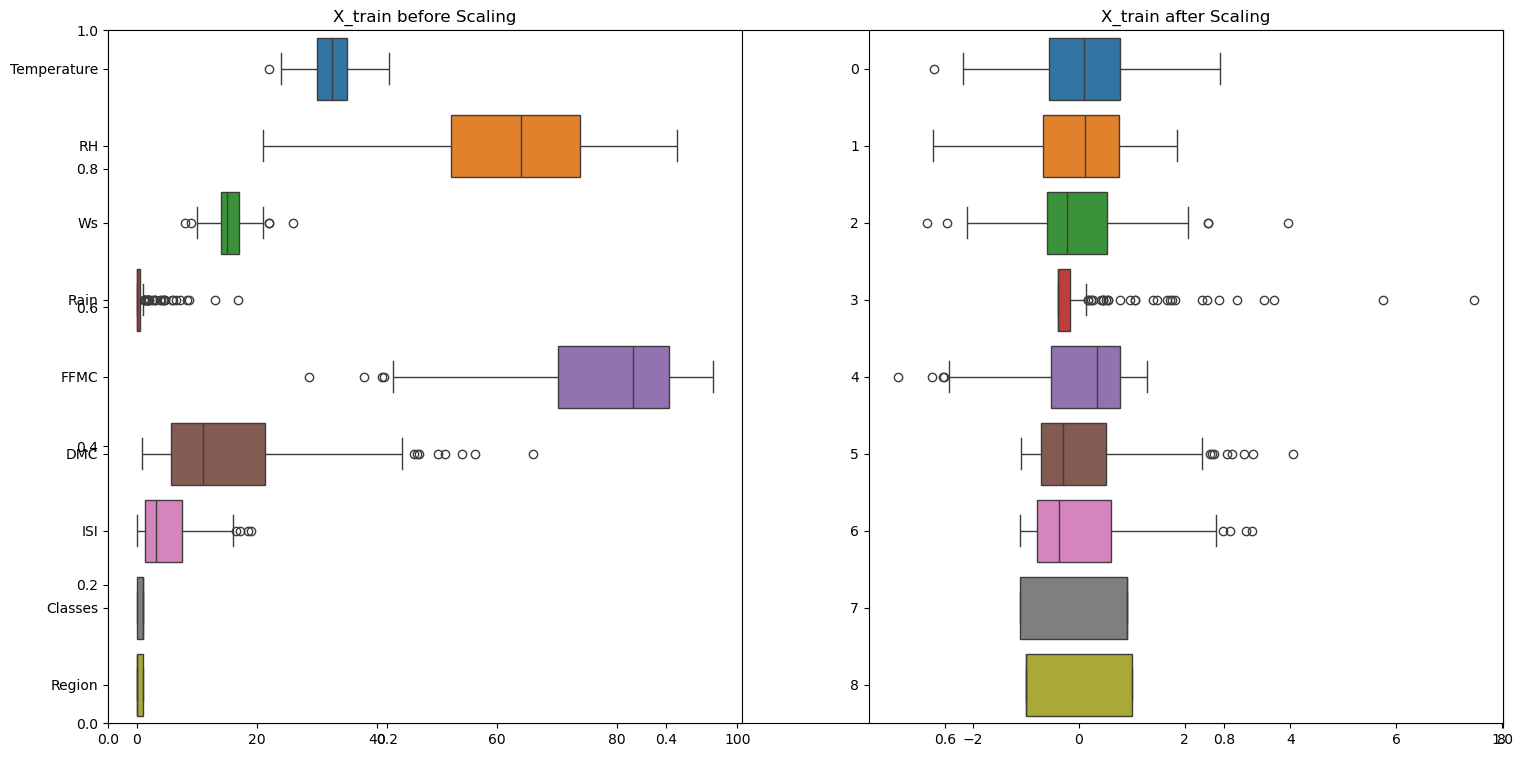

In [ ]:
plt.subplots(figsize=(18, 9))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train, orient='h')
plt.title('X_train before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scale, orient='h')
plt.title('X_train after Scaling')
plt.show()

## Linear Regression

Mean Absolute Error: 0.5468236465249995
R2 Score: 0.9847657384266951


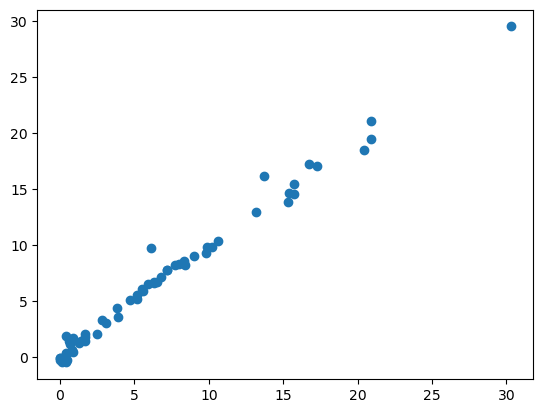

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scale, Y_train)
Y_pred = lin_reg.predict(X_test_scale)

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

plt.scatter(Y_test, Y_pred)

## Lasso Regression

Mean Absolute Error: 1.1331759949144087
R2 Score: 0.9492020263112388


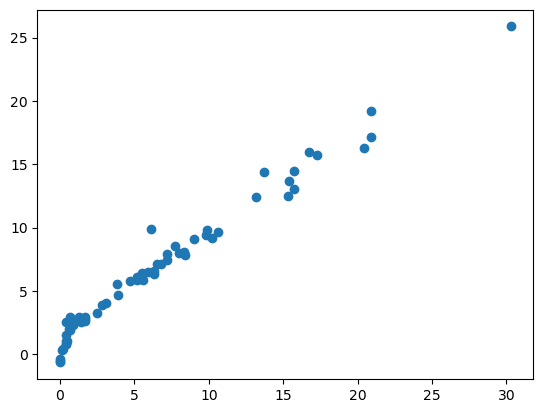

In [66]:
lasso = Lasso()
lasso.fit(X_train_scale, Y_train)
Y_pred = lasso.predict(X_test_scale)

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

plt.scatter(Y_test, Y_pred)

In [ ]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scale, Y_train)

LassoCV(cv=5)

In [71]:
lasso_cv.predict(X_test_scale)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [72]:
lasso_cv.alpha_

np.float64(0.05725391318234408)

In [73]:
lasso_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error: 0.6199701158263433
R2 Score: 0.9820946715928275


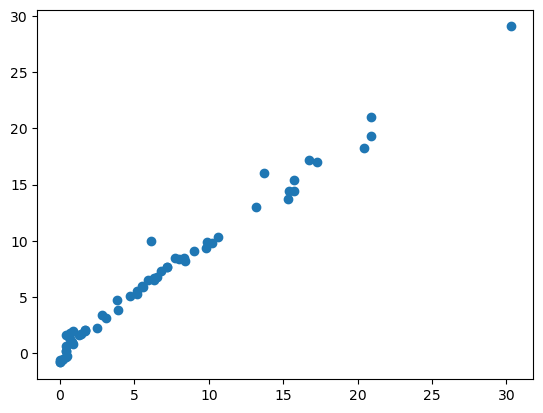

In [75]:
Y_pred = lasso_cv.predict(X_test_scale)
plt.scatter(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

## Ridge Regression

Mean Absolute Error: 0.5642305340105677
R2 Score: 0.9842993364555515


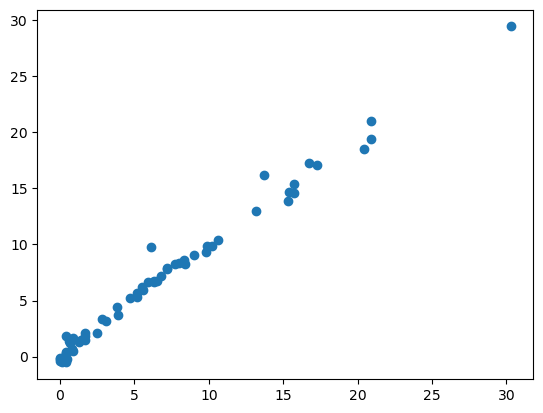

In [76]:
ridge = Ridge()
ridge.fit(X_train_scale, Y_train)
Y_pred = ridge.predict(X_test_scale)

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

plt.scatter(Y_test, Y_pred)

Mean Absolute Error: 0.5642305340105677
R2 Score: 0.9842993364555515


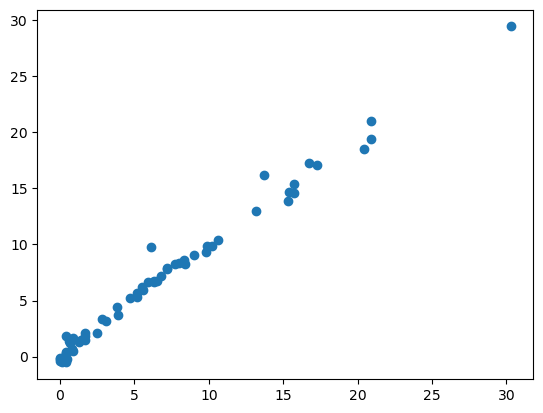

In [77]:
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scale, Y_train)
Y_pred = ridge_cv.predict(X_test_scale)

plt.scatter(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

In [78]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

In [79]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elasticnet Regression

Mean Absolute Error: 1.8822353634896005
R2 Score: 0.8753460589519703


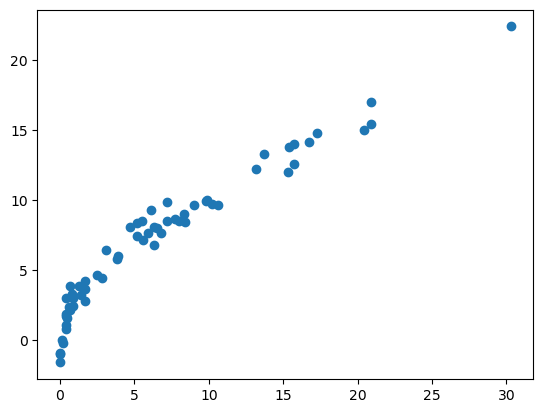

In [69]:
elastic_net = ElasticNet()
elastic_net.fit(X_train_scale, Y_train)
Y_pred = elastic_net.predict(X_test_scale)

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

plt.scatter(Y_test, Y_pred)

Mean Absolute Error: 0.6575946731430896
R2 Score: 0.9814217587854942


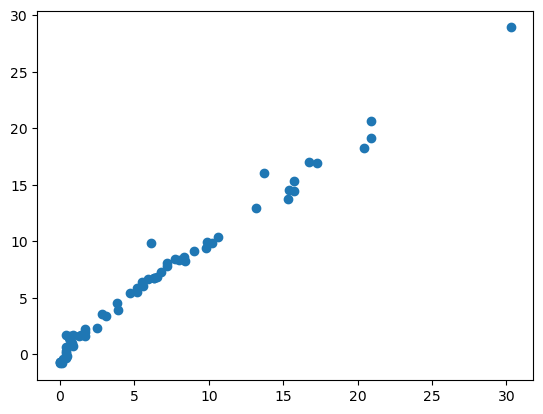

In [80]:
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scale, Y_train)
Y_pred = elastic_net_cv.predict(X_test_scale)

plt.scatter(Y_test, Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {score}')

In [81]:
elastic_net_cv.alpha_

np.float64(0.04311146156383891)

In [82]:
elastic_net_cv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

### Pickle the model

In [ ]:
# Pickle the model, preprocessing, and scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb')) 